# Part 1

### Basics of Qiskit

### Two stages: Build and Execute


In [ ]:
# Build


# Execute


# When you run a program, a job object is made that has the following two methods: 
# job.status() and job.result() which return the status of the job and a result object respectively.


### General algorithm flow
Quantum part:
1. Initialization to 0
2. Apply H
3. Run subsequent one- and two-qubit gates
4. Measurement

Classical part:
- postprocessing
- confirm the answer is correct

### Import the libraries

In [1]:
import numpy as np
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram

qasm_sim = BasicAer.get_backend('qasm_simulator')

/anaconda3/envs/Qiskitenv/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


### Backends

Quantum algorithms can be started on a real quantum computer or on a local or remote simulator.  
Use Qiskit IBMQ class to obtain the list of available backends.  
  
Note: Your Q account must be loaded to obtain the data

In [2]:
from qiskit import IBMQ
IBMQ.load_accounts()
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [3]:
from qiskit.tools.monitor import backend_monitor,backend_overview
backend_overview()

/anaconda3/envs/Qiskitenv/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


ibmq_16_melbourne            ibmqx4
-----------------            ------
Num. Qubits:  14             Num. Qubits:  5
Pending Jobs: 70             Pending Jobs: 5
Least busy:   False          Least busy:   True
Operational:  True           Operational:  True
Avg. T1:      56.2           Avg. T1:      48.0
Avg. T2:      70.7           Avg. T2:      25.4





In [4]:
backend = IBMQ.get_backend('ibmq_16_melbourne')
backend_monitor(backend)

ibmq_16_melbourne
Configuration
-------------
    n_qubits: 14
    operational: True
    status_msg: calibrating
    pending_jobs: 70
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    max_experiments: 75
    online_date: 2018-11-06T05:00:00+00:00
    credits_required: True
    sample_name: albatross
    backend_name: ibmq_16_melbourne
    url: None
    allow_q_object: True
    open_pulse: False
    conditional: False
    n_registers: 1
    memory: False
    max_shots: 8192
    coupling_map: [[1, 0], [1, 2], [2, 3], [4, 3], [4, 10], [5, 4], [5, 6], [5, 9], [6, 8], [7, 8], [9, 8], [9, 10], [11, 3], [11, 10], [11, 12], [12, 2], [13, 1], [13, 12]]
    description: 14 qubit device
    backend_version: 1.0.0

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 5.10008 GHz / 67.86304 µs / 21.46336 µs / 0.0 / 0.00156 / 0.00312 / 0.0236
    Q1 / 5.23865 GH

In [5]:
backend.status()

BackendStatus(backend_name='ibmq_16_melbourne', backend_version='1.0.0', operational=True, pending_jobs=70, status_msg='calibrating')

### Concept of registries
A circuit can have several quantum registers and several classical registers. 
Every register needs to have a name and the number of the elements (Qbits for quantum register or bits for classical registers). 

In [7]:
q0 = QuantumRegister(3, 'q0')
q1 = QuantumRegister(2, 'q1')
qc = QuantumCircuit(q0,q1)

qc.draw()

### Let's apply X, Z, Y and H gates

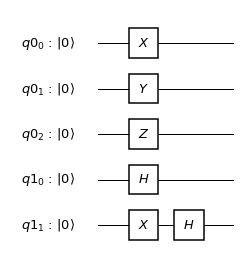

In [8]:
qc.x(q0[0])
qc.y(q0[1])
qc.z(q0[2])

qc.h(q1[0])
qc.x(q1[1])
qc.h(q1[1])

qc.draw(output = 'mpl')

### Let's measure the qubits

In [9]:
c=ClassicalRegister(5,'c')
qc.add_register(c)

qc.measure(q0[0],c[0])
qc.measure(q0[1],c[1])
qc.measure(q0[2],c[2])
qc.measure(q1[0],c[3])
qc.measure(q1[1],c[4])

qc.draw()

JobStatus.RUNNING
JobStatus.RUNNING
{'11011': 262, '01011': 240, '10011': 228, '00011': 270}
JobStatus.DONE


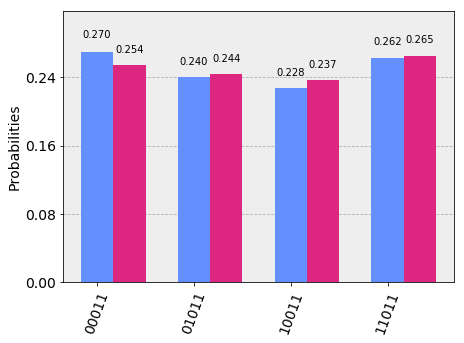

In [10]:
job = execute(qc, qasm_sim, shots=1000)

print(job.status())
print(job.status())

results = job.result().get_counts()
print(results)
print(job.status())

job2 = execute(qc, qasm_sim, shots=1000)
results2 = job2.result().get_counts()

plot_histogram([results,results2])

### Let's create another circuit and put the qubits in entanglement

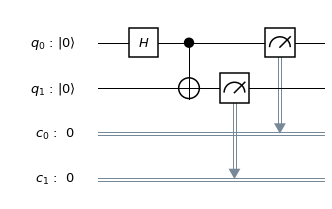

In [11]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.cx(q[0],q[1])

qc.measure(q[0],c[0])
qc.measure(q[1],c[1])

qc.draw(output = 'mpl')

#### This is the first Bell state   
  
\$
\frac{1}{\sqrt2}(|00⟩+|11⟩)
\$

{'00': 496, '11': 504}


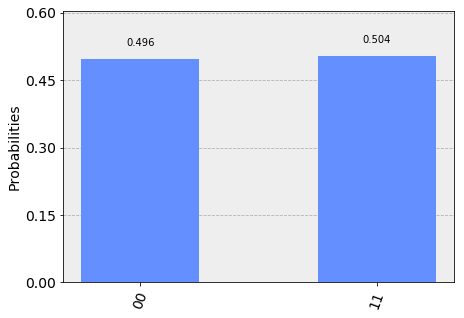

In [12]:
job = execute(qc, qasm_sim, shots=1000)

results = job.result().get_counts()
print(results)

plot_histogram(results)

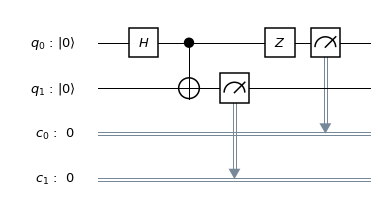

In [13]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.cx(q[0],q[1])
qc.z(q[0])

qc.measure(q[0],c[0])
qc.measure(q[1],c[1])

qc.draw(output = 'mpl')

#### This is the second Bell state   
  
\$
\frac{1}{\sqrt2}(|00⟩-|11⟩)
\$

{'00': 515, '11': 485}


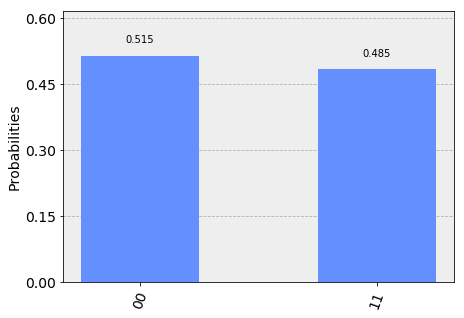

In [14]:
job = execute(qc, qasm_sim, shots=1000)
results = job.result().get_counts()
print(results)

plot_histogram(results)

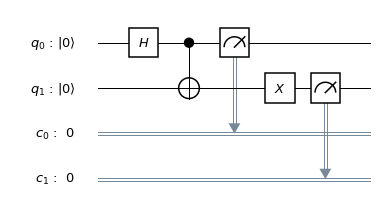

In [15]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.cx(q[0],q[1])
qc.x(q[1])

qc.measure(q[0],c[0])
qc.measure(q[1],c[1])

qc.draw(output='mpl')

#### This is the third Bell state   
  
\$
\frac{1}{\sqrt2}(|01⟩+|10⟩)
\$

{'10': 487, '01': 513}


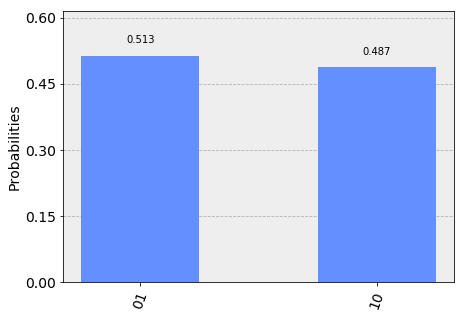

In [16]:
job = execute(qc, qasm_sim, shots=1000)
results = job.result().get_counts()
print(results)

plot_histogram(results)

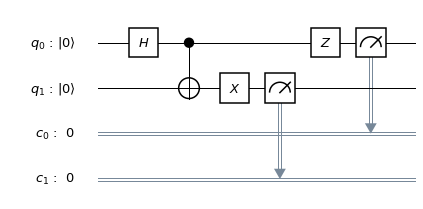

In [20]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.cx(q[0],q[1])
qc.z(q[0])
qc.x(q[1])

qc.measure(q[0],c[0])
qc.measure(q[1],c[1])

qc.draw(output = 'mpl')

#### This is the fourth Bell state   
  
\$
\frac{1}{\sqrt2}(|01⟩-|10⟩)
\$

{'10': 477, '01': 523}


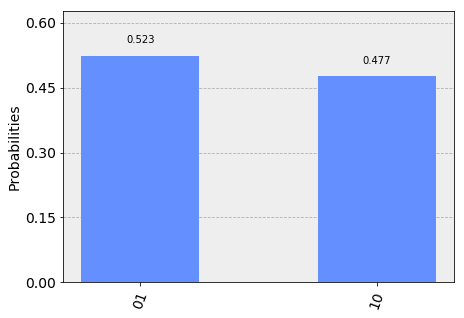

In [21]:
job = execute(qc, qasm_sim, shots=1000)
results = job.result().get_counts()
print(results)

plot_histogram(results)

### We will now create the circuit for GHZ state of three entangled qubits   
  
\$
\frac{1}{\sqrt2}(|000⟩-|111⟩)
\$

{'000': 95, '111': 105}


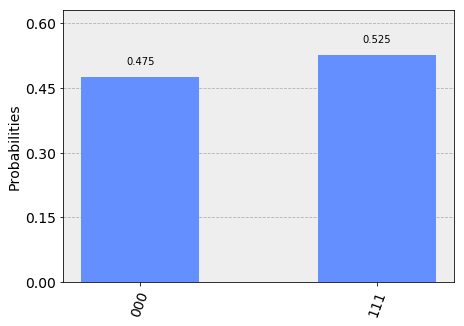

In [24]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.h(q[1])
qc.x(q[2])
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])

qc.barrier()

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

qc.barrier()

qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])

#qc.draw(output = 'mpl')

job = execute(qc, qasm_sim, shots=200)
results = job.result().get_counts()

print(results)
plot_histogram(results)

### Let's test Toffoli gate with bit addition example

We will use three qubits and demonstrate bit addition operation.  
For that we need Toffoli gate, which will flip the qubit 2 in case qubits 0 and 1 both have value 1.

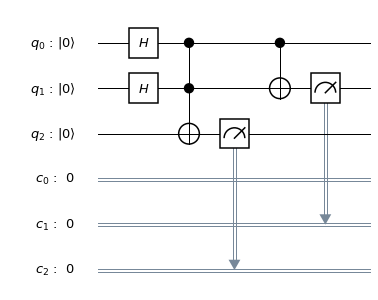

In [25]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
qc=QuantumCircuit(q, c)

qc.h(q[0])
qc.h(q[1])
qc.ccx(q[0], q[1], q[2])
qc.cx(q[0], q[1])

qc.measure(q[1],c[1])
qc.measure(q[2],c[2])

qc.draw(output='mpl')

{'010': 475, '100': 255, '000': 270}


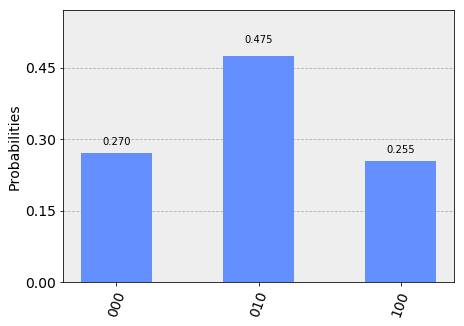

In [26]:
job = execute(qc, qasm_sim, shots=1000)
results = job.result().get_counts()
print(results)

plot_histogram(results)

Our circuit calculates all results simultaneously :  
    - 000 is the result of 0 + 0 , the probability of the result is 0.25  
    - 010 is the result of 0 + 1 and 1 + 0, the probability of this result is 0.5  
    - 100 is the result of 1 + 1 , the probability of the result if 0.25  

# Part 2

### Deutsch's Problem  
f(x) constant or balanced ?  
Constant -> f(0) = f(1) = 0 or f(0) = f(1) = 1  
Balanced -> f(0) = 0 and f(1) = 1, or f(1) = 0 and f(0) = 1  

### Deutsch's Algorithm
1: Initialize qubit x in state |0〉  
2: Initialize qubit y in state |1〉Use X gate  
3: Apply the Hadamard gate H to both qubits  
4: Apply the circuit Uf  
5: Apply the Hadamard gate H on qubit x  
6: Measure qubit x.   

If x is |0〉, the function is constant. If it is |1〉, the function is balanced

### Circuit with constant function 
Constant function giving zero. Circuit is implemented with identity function

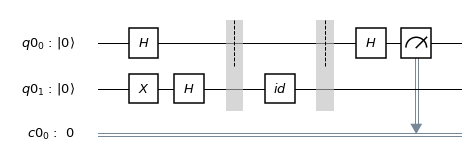

In [27]:
q=QuantumRegister(2)
qc=QuantumCircuit(q)
c=ClassicalRegister(1)
qc.add_register(c)

qc.x(q[1])
qc.h(q[0])
qc.h(q[1])
    
qc.barrier()
qc.iden(q[1])
qc.barrier()
    
qc.h(q[0])
qc.measure(q[0],c[0])
qc.draw(output = 'mpl')

In [28]:
job = execute(qc, qasm_sim, shots=50)
results = job.result().get_counts()
print(results)

{'0': 50}


### Circuit with constant function 
Constant function giving one. Circuit is implemented with bit flip gate on the qubit 1

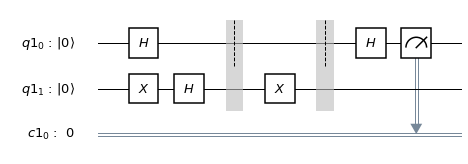

In [29]:
q=QuantumRegister(2)
qc=QuantumCircuit(q)
c=ClassicalRegister(1)
qc.add_register(c)

qc.x(q[1])
qc.h(q[0])
qc.h(q[1])
    
qc.barrier()
qc.x(q[1])
qc.barrier()
    
qc.h(q[0])
qc.measure(q[0],c[0])
qc.draw(output = 'mpl')

In [30]:
job = execute(qc, qasm_sim, shots=50)
results = job.result().get_counts()
print(results)

{'0': 50}


### Circuit with balanced function 
Variable output, outputs the input. Circuit is implemented with CNOT gate from the qubit 0 to qubit 1

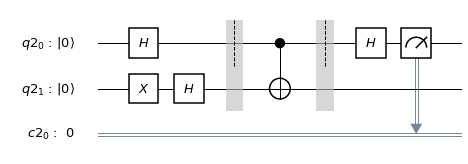

In [31]:
q=QuantumRegister(2)
qc=QuantumCircuit(q)
c=ClassicalRegister(1)
qc.add_register(c)

qc.x(q[1])
qc.h(q[0])
qc.h(q[1])

qc.barrier()
qc.cx(q[0], q[1])
qc.barrier()

qc.h(q[0])
qc.measure(q[0],c[0])
qc.draw(output='mpl')

In [32]:
job = execute(qc, qasm_sim, shots=50)
results = job.result().get_counts()
print(results)

{'1': 50}


### Circuit with balanced function 
Variable output, outputs the inverse of the input.  
Circuit is implemented with CNOT gate from the qubit 0 to qubit 1, followed with the bit flip of the qubit 1

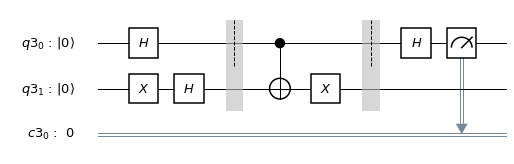

In [33]:
q=QuantumRegister(2)
qc=QuantumCircuit(q)
c=ClassicalRegister(1)
qc.add_register(c)

qc.x(q[1])
qc.h(q[0])
qc.h(q[1])
      
qc.barrier()
qc.cx(q[0], q[1]), qc.x(q[1])
qc.barrier()

qc.h(q[0])
qc.measure(q[0],c[0])
qc.draw(output = 'mpl')

In [34]:
job = execute(qc, qasm_sim, shots=50)
results = job.result().get_counts()
print(results)

{'1': 50}


### Put all these functions together

In [35]:
def blackbox(oracleType=None):

    if oracleType == None:
        oracleType = np.random.randint(4)

    oracles = {0: 'qc.iden(q[1])', 1: 'qc.x(q[1])', 2: 'qc.cx(q[0], q[1])', 3: 'qc.cx(q[0], q[1]), qc.x(q[1])'}
    return oracles[oracleType]

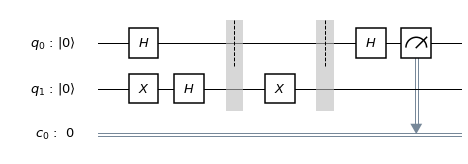

In [36]:
q=QuantumRegister(2, 'q')
qc=QuantumCircuit(q)
c=ClassicalRegister(1, 'c')
qc.add_register(c)

qc.x(q[1])
qc.h(q[0])
qc.h(q[1])
      
qc.barrier()

exec(blackbox())

qc.barrier()

qc.h(q[0])
qc.measure(q[0],c[0])
qc.draw(output = 'mpl')

In [37]:
job = execute(qc, qasm_sim, shots=50)
results = job.result().get_counts()
print(results)

{'0': 50}


In [38]:
from math import pi

q = QuantumRegister(18,'q')
qc = QuantumCircuit(q)

qc.x(q[17])
qc.z(q[16])
qc.y(q[15])
qc.h(q[14])
qc.iden(q[13])
qc.s(q[12])
qc.sdg(q[11])
qc.t(q[10])
qc.tdg(q[9])

qc.rx(pi/2,q[8])
qc.ry(pi/2,q[7])
qc.rz(pi/2,q[6])

qc.u3(pi/2,pi/2,pi/2,q[5])
qc.u2(pi/2,pi/2,q[4])
qc.u1(pi/2,q[3])

qc.ccx(q[0], q[1], q[2])
qc.cswap(q[0], q[1], q[2])

qc.swap(q[0], q[1])
qc.cx(q[0],q[1])
qc.cy(q[0],q[1])
qc.cz(q[0],q[1])
qc.ch(q[0],q[1])
qc.crz(pi/2,q[1],q[0])
qc.cu3(pi/2, pi/2, pi/2, q[0], q[2])

qc.draw(line_length=240)